In [1]:
import pandas as pd
import numpy as np

orcs = pd.read_csv('orcs_cleaned.csv', index_col=0, encoding='utf-8')
orcs

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
orc_id,,,,,,,
2,33,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область,31-35
3,28,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область,26-30
4,26,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край,26-30
5,19,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край,18-20
8,36,русский,1,среднее,Прапорщики и мичманы,Томская область,36-40
...,...,...,...,...,...,...,...
110825,29,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея,26-30
110826,37,русский,0,среднее,старшие офицеры,Республика Адыгея,36-40
110828,34,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея,31-35


In [2]:

features = orcs.drop(['age'], axis=1)
features = features.drop(['age_range'], axis=1)
features

,nationality,family,edu_lvl_cl,mil_rank_cl,region
orc_id,,,,,
2,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Кировская область
3,бурят,1,среднее,"Солдаты, матросы, сержанты, старшины",Сахалинская область
4,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
5,русский,1,среднее,"Солдаты, матросы, сержанты, старшины",Приморский край
8,русский,1,среднее,Прапорщики и мичманы,Томская область
...,...,...,...,...,...
110825,русский,0,среднее,"Солдаты, матросы, сержанты, старшины",Республика Адыгея
110826,русский,0,среднее,старшие офицеры,Республика Адыгея
110828,русский,1,среднее,Прапорщики и мичманы,Республика Адыгея


In [3]:
from sklearn.preprocessing import LabelEncoder

orcs_encoded= orcs
lables = orcs_encoded.columns
size = len(lables)
for i in range(size):
    orcs_encoded[lables[i]]= LabelEncoder().fit_transform(orcs_encoded[lables[i]])   
orcs_encoded

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
orc_id,,,,,,,
2,15,16,1,1,1,21,3
3,10,5,1,1,1,65,2
4,8,16,1,1,1,42,2
5,1,16,1,1,1,42,0
8,18,16,1,1,0,71,4
...,...,...,...,...,...,...,...
110825,11,16,0,1,1,44,2
110826,19,16,0,1,4,44,4
110828,16,16,1,1,0,44,3


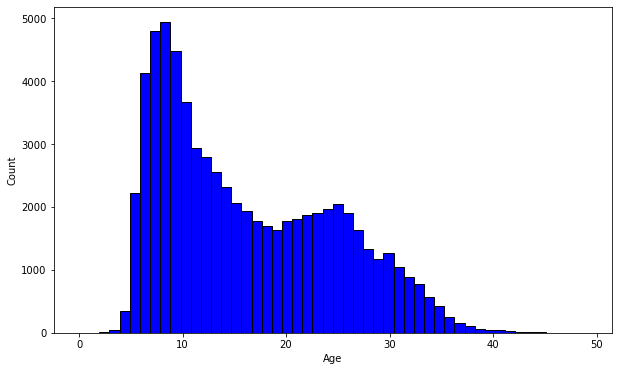

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(orcs.age, bins=50, ec='black', color='b')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


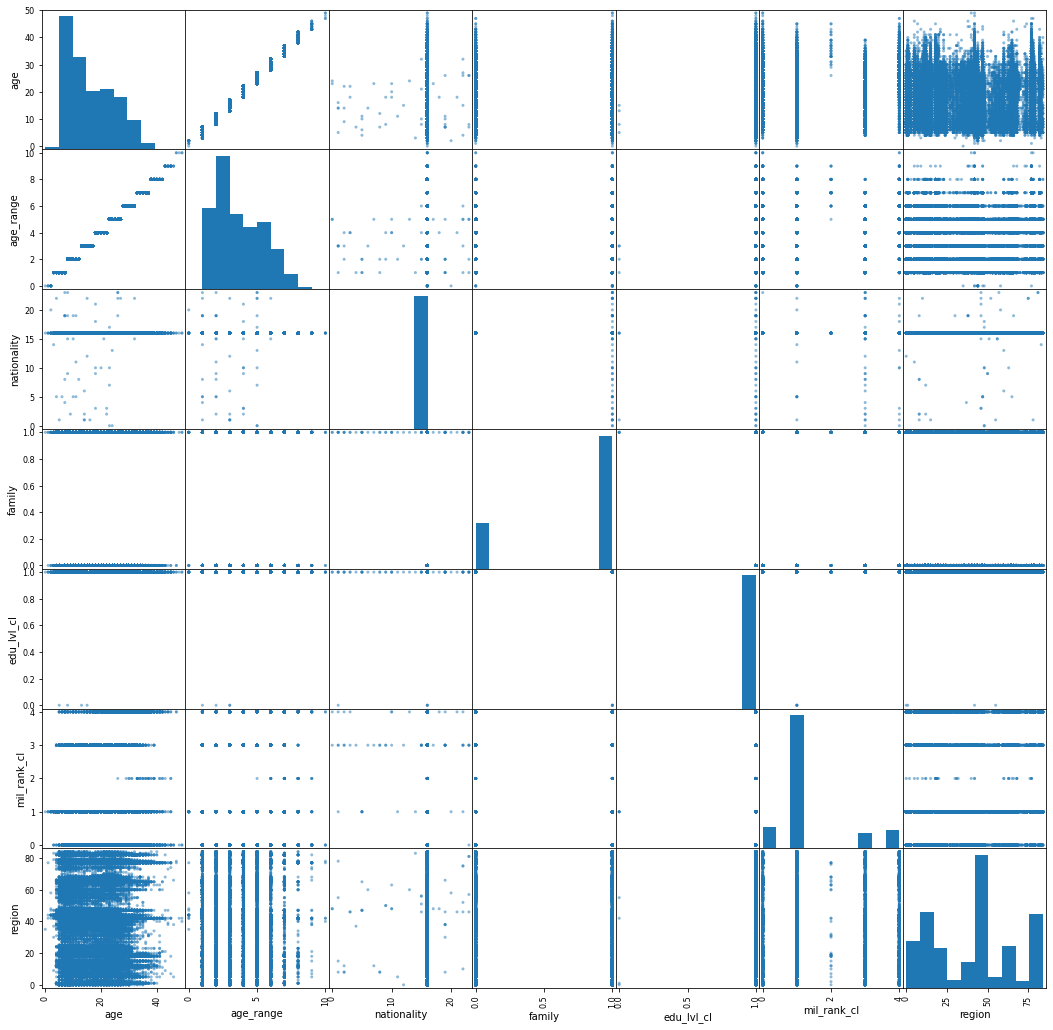

In [5]:
pd.plotting.scatter_matrix(orcs_encoded[['age','age_range', 'nationality', 'family', 'edu_lvl_cl',  'mil_rank_cl', 'region']], figsize=(18,18))
print("")


In [6]:
orcs_encoded

,age,nationality,family,edu_lvl_cl,mil_rank_cl,region,age_range
orc_id,,,,,,,
2,15,16,1,1,1,21,3
3,10,5,1,1,1,65,2
4,8,16,1,1,1,42,2
5,1,16,1,1,1,42,0
8,18,16,1,1,0,71,4
...,...,...,...,...,...,...,...
110825,11,16,0,1,1,44,2
110826,19,16,0,1,4,44,4
110828,16,16,1,1,0,44,3


In [7]:
mask = np.zeros_like(orcs_encoded.corr())
triangle_indeces = np.triu_indices_from(mask)
mask[triangle_indeces] = True
mask

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

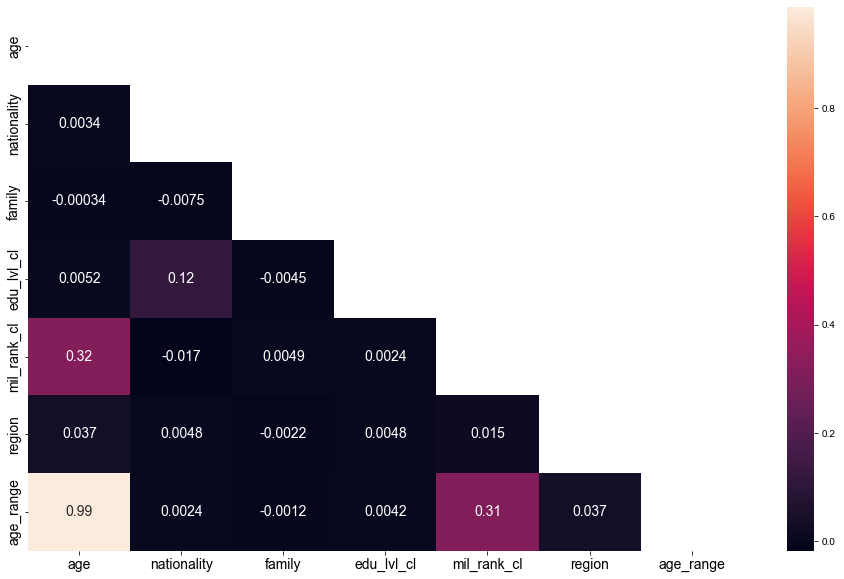

In [8]:
import seaborn as sns

Mask = np.zeros_like(orcs_encoded.corr())
triangle_indeces = np.triu_indices_from(Mask)
Mask[triangle_indeces] = True

plt.figure(figsize=(16,10))
sns.heatmap(orcs_encoded.corr(), mask=Mask, annot = True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [9]:
targets = orcs_encoded.age
features = orcs_encoded
features = features.drop(['age_range'], axis=1)
features = features.drop(['age'], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42)

d:\Programms\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1130.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        15:25:15   Log-Likelihood:            -1.7756e+05
No. Observations:               50582   AIC:                         3.551e+05
Df Residuals:                   50576   BIC:                         3.552e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.4946      6.220      1.205      

d:\Programms\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


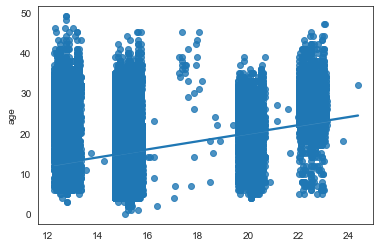

In [11]:
import statsmodels.api as sm
X_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, X_incl_const)
result= model.fit()
print(result.summary())
r=result.predict(X_incl_const)
r=np.array(result)
sns.regplot(result.fittedvalues.copy(), y_train)
plt.show()

In [12]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()

pd.DataFrame({'coef': result.params, 'p-values': round(result.pvalues,3)})

d:\Programms\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-values
const,7.494577,0.228
nationality,0.244109,0.108
family,-0.102812,0.212
edu_lvl_cl,0.955428,0.867
mil_rank_cl,2.446068,0.000
region,0.011927,0.000


Бачимо, що p-values у колонок nationality, family, та edu_lvl_cl - завелике. Перевіримо на мультиколеніарність

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, X_incl_const)
result = model.fit()

vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx = i) for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name': x_incl_const.columns, 'vif': np.around(vif, 2)})

d:\Programms\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef_name,vif
0,const,29853.89
1,nationality,1.00
2,family,1.00
3,edu_lvl_cl,1.00
4,mil_rank_cl,1.00
5,region,1.00


Всі дані мають vif < 5, тому спробуємо побудувати модель використовуючи BIC

In [14]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_incl_const)
result = model.fit()    

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 355187.10604174755
R-squared: 0.1005099949037801


d:\Programms\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Спробуємо по черзі прибирати поля що мають великий P-value

In [15]:
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['nationality'], axis=1)

model = sm.OLS(y_train, x_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 355178.8601924446
R-squared: 0.10046401624679291


In [16]:
x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['nationality', 'family'], axis=1)

model = sm.OLS(y_train, x_incl_const)
result = model.fit() 

print('BIC: \t', result.bic)

print('R-squared:', result.rsquared)

BIC: 	 355169.61227160867
R-squared: 0.10043585653070153


результат покращився, але незначно :( Залишимо як і було.

In [17]:
regression_results = pd.DataFrame(columns = ['method', 'r2_train', 'r2_test','MAE_train', 'MAE_test','MSE_train', 'MSE_test', 'training_time'])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, random_state=42)

In [19]:
import warnings

warnings.filterwarnings("ignore")

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def get_metrics(y_train, y_train_prediced, y_test, y_test_prediced):
    r2_train = r2_score(y_train, y_train_prediced)
    r2_test = r2_score(y_test, y_test_prediced)
    mae_train = mean_absolute_error(y_train, y_train_prediced)
    mae_test = mean_absolute_error(y_test, y_test_prediced)
    mse_train = mean_squared_error(y_train, y_train_prediced)
    mse_test = mean_squared_error(y_test, y_test_prediced)
    return r2_train, r2_test, mae_train, mae_test, mse_train, mse_test

In [21]:
from sklearn.linear_model import LinearRegression
import time

t_start = time.perf_counter()
model = LinearRegression().fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'Linear Regression', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)


In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params_dict = {
    'params':[
        {
        "learning_rate": [0.05, 0.1, 0.2],
        "min_samples_split": np.linspace(0.1, 0.5, 4),
        "min_samples_leaf": np.linspace(0.1, 0.5, 4),
        "max_depth": [3, 5],
        "alpha": [0.5, 0.7, 1.0],
        "max_features": [0.1, 0.5, 0.9],
        }
    ]
}   

grid = GridSearchCV(GradientBoostingRegressor(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'Gradient Boosting egressor', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)

In [ ]:
from sklearn.linear_model import Lasso
params_dict = {
    'params':[
        {
        "alpha": np.logspace(0, 100, 100),
        }
    ]
}   

grid = GridSearchCV(Lasso(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'Lasso', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)

NameError: name 'GridSearchCV' is not defined

: 

In [ ]:
from sklearn.linear_model import Ridge
params_dict = {
    'params':[
        {
        "alpha": np.logspace(0, 100, 100),
        }
    ]
}   

grid = GridSearchCV(Ridge(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'Ridge', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)

: 

In [ ]:
from sklearn.linear_model import ElasticNet

params_dict = {
    'params':[
        {
        "alpha":  np.logspace(0, 20, 10),
        "l1_ratio": np.linspace(0.1, 0.9, 9),
        }
    ]
}

grid = GridSearchCV(ElasticNet(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'Elastic Net', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)

: 

In [ ]:
from sklearn.linear_model import SGDRegressor
params_dict = {
    'params':[
        {
        "penalty": ["l1", "l2", "elasticnet"],
        "alpha": [0.0001, 0.001, 0.01, 0.1],
        "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
        "max_iter": [1000, 2000, 3000],
        "tol": [1e-3, 1e-4, 1e-5],
        }
    ]
}   

grid = GridSearchCV(SGDRegressor(), params_dict['params'], 
                            refit=True, cv=3, scoring='accuracy', n_jobs=3)
t_start = time.perf_counter()                    
model = grid.fit(x_train, y_train)
t_diff = time.perf_counter() - t_start

y_train_prediced = model.predict(x_train)
y_test_prediced = model.predict(x_test)

r2_train, r2_test, MAE_train, MAE_test, MSE_train, MSE_test = get_metrics(y_train, y_train_prediced, y_test, y_test_prediced)
regression_results = regression_results.append({'method':'SGD Regressor', 'r2_train':r2_train, 'r2_test': r2_test, 'MAE_train': MAE_train,'MAE_test': MAE_test,'MSE_train': MSE_test,'MSE_test': r2_test,'training_time': t_diff}, ignore_index=True)

: 

In [ ]:
regression_results

,method,r2_train,r2_test,MAE_train,MAE_test,MSE_train,MSE_test,training_time
0,Linear Regression,1.005100e-01,1.045411e-01,6.688248e+00,6.683132e+00,6.523926e+01,1.045411e-01,0.805318
1,Linear Regression Polynomial Features,3.482701e-01,3.616086e-01,5.574267e+00,5.514811e+00,4.651043e+01,3.616086e-01,38.815116
2,Logistic Regression,-3.293708e-01,-3.016206e-01,6.921000e+00,6.817271e+00,9.483044e+01,-3.016206e-01,205.625168
3,Gradient Boosting egressor,2.971357e-01,3.074343e-01,5.953052e+00,5.913739e+00,5.045734e+01,3.074343e-01,485.508214
4,Lasso,8.904662e-02,9.120659e-02,6.877613e+00,6.877304e+00,6.621075e+01,9.120659e-02,2.146025
5,Elastic Net,9.681731e-02,9.971506e-02,6.787128e+00,6.785521e+00,6.559086e+01,9.971506e-02,2.506340
6,SGD Regressor,-3.754784e+13,-4.023898e+13,2.252054e+06,2.490046e+06,2.931638e+15,-4.023898e+13,292.039258
7,Lasso,8.904662e-02,9.120659e-02,6.877613e+00,6.877304e+00,6.621075e+01,9.120659e-02,1.870807
8,Ridge,1.005099e-01,1.045348e-01,6.688253e+00,6.683175e+00,6.523971e+01,1.045348e-01,9.768240


: 